# Нейронные сети и Keras: быстрый старт.

**В этой тетради мы**
* повторим основные термины, связанные с нейросетями;
* познакомимся с библиотекой Keras для построения нейросетевых моделей и набором данных MNIST;
* подготовим данные к обучению модели;
* созадим и обучим простую нейросетевую модель классификации рукописных цифр;

---


## Напоминание. Что такое нейросеть?

Простейшая нейросеть состоит из **нейронов** - вычислительных узлов.

<img src="https://avatars.mds.yandex.net/i?id=c81731b446ff028e88be2190b1c97879bdac7844-12422488-images-thumbs&n=13" width="400">















Нейроны объединяются в слои. **Полносвязные слои** (dense layers) нейронов: все элементы входных данных связаны с каждым нейроном.

Слои нейронов между входными и выходными данными называются **скрытыми слоями** (hidden layers). Чем больше слоев, тем **глубже** нейросеть.

<img src="https://neurohive.io/wp-content/uploads/2018/07/neuronnaya-set.gif" width="500">


Нейросеть можно строить из множества "блоков" (слоев), как конструктор. Каждый блок может обладать своей архитектурой, независимо вычисляя выходные данные и градиенты.

<table>
<tr>
<td><img src="https://spectrum.ieee.org/image/MjkxMjcwNg.octet-stream" width="400"></td>
<td><img src="https://img.icons8.com/plasticine/2x/arrow.png" width="200"></td>
<td><img src="https://payload.cargocollective.com/1/14/467087/7241356/lego%20cerebro%20definitivo_1_905.jpg" width="500"></td>
</tr>





---

## Библиотека Keras

Основные возможности

<img src="https://keras.io/img/keras-logo-small-wb.png" width="300">

* Библиотека для машинного обучения (прежде всего, для обучения нейронных сетей) на языке Python

* **Keras**  - удобный "пользовательский интерфейс", надстройка над более низкоуровневыми библиотеками (например, TensorFlow), позволяющая строить нейронные сети с высокой эффективностью и скоростью.

* Основные принципы:
    1. Удобство использования
    2. Модульность
    3. Масштабируемость
    4. Работа с Python
    
Инструмент с низким порогом входа, подходящий как продвинутым исследователям, так и любителям.


---



## Набор данных MNIST


MNIST — один из стандартных датасетов с изображениями для тестирования алгоритмов машинного обучения.

Он содержит 60 000 образцов рукописного написания цифр от 0 до 9. Все картинки предсавлены в оттенках серого и имеют размер 28х28 пикселей.  

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Мы будем строить моделей для определения цифры по ее рукописному изображению, и, соответственно, решать задачу 10-классовой классификации.




---




# План анализа данных

  1. Загрузить данные для обучения;
  2. Обработать данные перед обучением модели;
  3. Создать модель для обучения;
  4. Обучить модель на обучающей выборке;
  5. Провалидировать модель на тестовой выборке;
  6. Попробовать улучшить модель.



---


Загрузим необходимые библиотеки: `keras` для работы с нейросетями, `numpy` для проведения вычислений над массивами данных, `matplotlib` для построения графиков.

* Наша нейронная сеть будет делать ряд последовательных преобразований входных данных, поэтому нам нужен тип нейронных сетей Sequential: импортируем его из раздела `keras.models`.

* Типы преобразований, с которыми мы будем работать: плотный слой Dense, активация Activation, преобразование картинки в длинный вектор Flatten. Каждое преобразование будет отдельным слоем в последовательной модели, поэтому импортируем их из `keras.layers`

In [1]:
# Импортируем сам keras
import keras
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation, Flatten
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import keras.datasets

import numpy as np
import keras
from keras import layers

import numpy as np
from matplotlib import pyplot as plt

Отключим лишние предупреждения от библиотек, в частности, от tensorflow, чтобы не засорять вывод наших результатов.

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

# 1. Загрузка данных.

В keras уже есть несколько популярных датасетов, которые можно легко загрузить. Давайте загрузим набор данных MNIST.

In [3]:
# Импортируем модуль датасета MNIST
from keras.datasets import mnist

In [4]:
# Выгрузим тренировочные и тестовые данные при помощи метода load_data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

В обучающей выборке 60000 изображений, по 6000 изображения каждого класса. В тестовой - 10000 изображений, по 1000 изображений каждого класса.

Посмотрим на содержание датасета, вызвав функцию `plot_MNIST_samples`,
которая строит на одной картинке **N** самплов из массива картинок
**X_train** для каждого класса.

*Вам не надо разбираться в коде функции, представленной ниже. Но для интересующихся мы добавили подробные комментарии к этой функции.*

In [5]:
def plot_MNIST_samples(image_data, label_data, classes,  N=8):
  """
    Эта функция строит N сэмплов каждого класса из датасета image_data

    Параметры
    ----------
    image_data : array, массив изображений размером
                (number_of_samples, image_width, image_height, number of channels)
    label_data : array, массив меток размером
                (number_of_samples, )
    classes : list, лист с именами классов
    N : int, кол-во сэмплов для каждого класса

  """

  # определяем кол-во классов
  num_classes = len(classes)

  # определяем сетку для будующих изображений, размером num_classes*N
  plt.figure(figsize=(num_classes,N))

  # для каждого класса
  for i, y in enumerate(classes):

      # определяем соответствующие ему индексы
      idxs = np.flatnonzero(label_data == y)

      # из них случайно выбираем N
      idxs = np.random.choice(idxs, N, replace=False)

      # проходим по каждому индексу и рисуем соответствующие изображения
      for i, idx in enumerate(idxs):
          plt_idx = i * num_classes + y + 1
          plt.subplot(N, num_classes, plt_idx)
          plt.imshow(image_data[idx], cmap='gray')
          plt.axis('off')
          if i == 0:
              plt.title(str(y))
  plt.show()

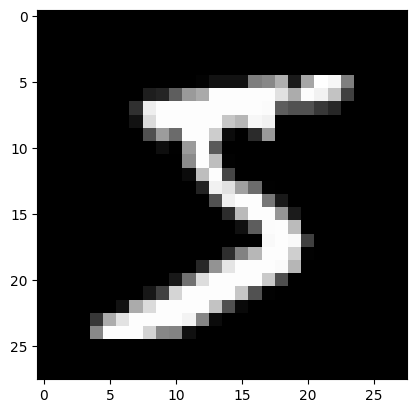

In [6]:
# Рисуем один элемент выборки
plt.imshow(x_train[0] , cmap= 'gray')

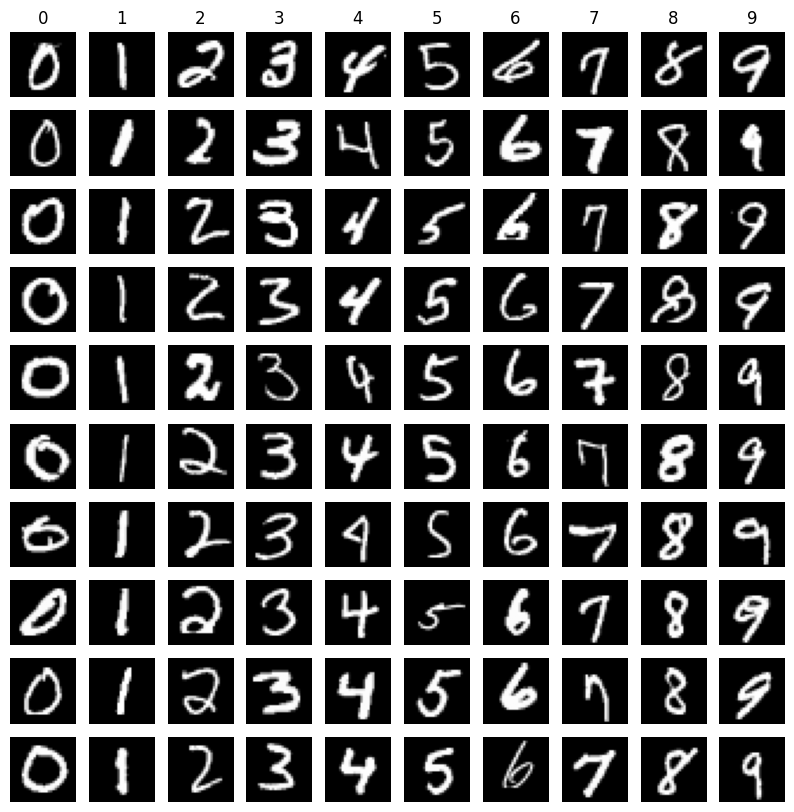

In [7]:
# Создадим лист с именами классов - цифрами от 0 до 9
classes = list(range(0,10))

# Выведем 7 наборов цифр
plot_MNIST_samples(x_train, y_train, classes, N=10)

# 2. Подготовка данных
**Нормализация значений на [0,1]**




Нейронные сети более капризны по сравнению с линейными моделями и моделями на основе решающих деревьев. Поэтому им особенно нужна предварительная нормализация данных: чтобы значения всех входных признаков лежали в интервале от $0$ до $1$.

Мы работаем с картинками, где каждый пиксель - это целое число от $0$ до $255$. У черно-белых картинок - это одно число, а у цветных - три таких числа, соответствующие каналам RGB.

Таким образом, нормализацию картинки можно сделать простым делением на $255$. Это классический трюк при работе с изображениями.


<img src="https://fsd.multiurok.ru/viewImage.php?image=http://piximus.net/media/19285/words-that-are-short-for-something-12.jpg" width="300">

In [8]:
# переводим область значений пикселей в [0-1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# убеждаемся в том, что картинки в правильном размере
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Перевод целевой переменной в one-hot формат**

Сейчас наша целевая переменная - картинки, закодированные цифрами от $0$ до $9$, то есть $10$ классов.
Для того чтобы нейронная сеть предсказывала вероятность принадлежности *к каждому* из этих десяти классов, нужно значение выходной переменной перевести в **one-hot формат**.

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)


Напомним, что такое **one-hot encoding**.

После one-hot encoding истинным значением целевой переменной будет вектор длины $10$, состоящий из $0$ с одной $1$ на месте номера класса, к которому принадлежит картинка.

Это делается функцией `keras.utils.to_categorical()`, которая принимает на вход исходный вектор значений целевой переменной и число классов.

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [12]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Посмотрим на то, в каком виде у нас хранятся входные признаки, напечатав размер первого объекта из обучающей выборки с помощью метода `shape`.

Для данных MNIST это изображения 28 на 28.

In [13]:
input_size = x_train[0].shape
input_size

(28, 28, 1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

# 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом. Инициализируем модель:

В нашей задаче признаки - это матрица пикселей размером 28х28.  Для начала попробуем подать эти признаки напрямую, растянув матрицу в один длинный вектор. Это один из классических способов подавать изображения на вход нейронной сети.


<img src="https://ml4a.github.io/images/figures/mnist_2layers.png" width="600">



Итак, будем строить следующую модель:

* сначала растягиваем картинку в длинный вектор слоем `Flatten`. Получается, что одной картинке соответствует 28*28=784 признака.
* потом идет полносвязный слой из 128 нейронов. Каждый из 128 нейронов принимает на вход 784 признака с предыдущего слоя, некоторым образом изменяет входные значения во время тренировки и передает одно значение на следующий слой.
* далее используем функцию активации `ReLU`
* потом идет следующий полносвязный слой. В нем $10$ выходов - по числу классов. В этом слое каждый из 10 нейронов принимает на вход 128 нейронов предыдущего слоя.
* в конце используем функцию активации `SoftMax`

**ReLU** - стандартный выбор для функции активации нейронов внутри нейросети. Несмотря на простоту функции, эксперименты показывают, что эта функция активации достаточна для эффективного обучения нейросетей.

**Softmax** - функция активации для выходного слоя нейронов в задачах классификации с числом классов $>2$. Она переводит выходные значения сети в вероятности принадлежности конкретного элемента выборки к одному из классов.

*Важно: в первом слое `Sequential` модели keras необходимо указать размерность входных данных $28*28=784$ , перед активацией делаем плотный слой с размерностью $10$ по числу классов*




In [15]:


model = keras.Sequential(
    [   # получаем на взод картинку
        keras.Input(shape=(28,28,1)),
        # Этот слой обеспечивае свертку картинки и сразу используем активацию
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        # Этот слой выбираем максимум из каждой области 2х2
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Этот слой обеспечивае свертку картинки и сразу используем активацию
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        # Этот слой выбираем максимум из каждой области 2х2
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Этот слой вытягивает двумерную картинку в вектор
        layers.Flatten(),
        # слой отвечает за регулязицию
        layers.Dropout(0.5),
        # Чтобы получить на выходе вероятности для каждого класса, выбираем активацию
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

После описания архитектуры необходимо скомпилировать модель при помощи метода `compile`, указав
* параметр `loss` - минимизируемую функцию потерь, которая измеряет насколько желаемый прогноз далек от фактического;
* параметр `optimizer` - оптимизатор, который будет подгонять веса модели;
* параметр `metrics` - метрику для мониторинга работы нейросети на отложенной выборке в процессе обучения.

В качестве функции потерь выберем `categorical entropy`, в качестве оптимизатора - Адам, в качестве метрики - количество правильно угаданных меток, `accuracy`.

<img src="https://leakyreluhome.files.wordpress.com/2020/01/ce_loss.png?w=352" width="300">

# 4. Обучение модели
**Обучение нейросети** - изменение **весов** нейронов при помощи метода обратного распространения ошибки

Полная структура модели задана, теперь будем ее обучать. Обучаем ее аналогично `sklearn` - с помощью метода `fit` (см. предыдущий семинар).

После запуска `fit` параметры оптимизируются с помощью выбранного оптимизатора `optimizer`. Фактически, это некоторое производное от алгоритма градиентного спуска. На каждом шаге градиентного спуска мы используем выбранную функцию потерь `loss`, которая подсчитана только на части выборки.


Два дополнительных параметра для обучения:
* **batch_size** - размер подвыборки, которая используется для одного шага оптимизации = 40
* **epochs** - число эпох - сколько раз мы проходим полностью по всей выборке

[Эксперименты](https://arxiv.org/abs/1609.04836) показывают, что выбор **batch_size** в диапазоне $32-512$ в среднем обеспечивает нормальную генерализационную способность нейросети, то есть помогает модели делать лучшие предсказания на новых данных, не присутствующих в тренировочной выборке.

Количество эпох **epochs** обычно выбирают так, чтобы метрика качества на валидационной выборке перестала убывать, но при этом не росла, то есть, не произошло переобучения.

В целом, подбор подобных макропараметров сети является отдельным классом задач, поскольку одна и та же архитектура нейросети может значительно улучшать/ухудшать результаты предсказаний в зависимости от выбранных значений.

In [ ]:
batch_size = 128
epochs = 5
# компилируем модель

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step - accuracy: 0.7566 - loss: 0.7797 - val_accuracy: 0.9775 - val_loss: 0.0837
Epoch 2/5
 83/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9600 - loss: 0.1367

При использовании keras в процессе тренировки модели отображаются значение loss-функции и метрики для каждой эпохи, что очень удобно. Для валидации берется один из батчей из тренировочной выборки, поэтому точность может быть завышена.

Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [ ]:
model.summary()

# 5. Валидация качества модели на тестовых данных.
Протестируем модель на тестовой выборке для этого используется метод `evaluate`.
Выводится **loss** и **точность**.

In [ ]:
# оцениваем качество модели
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Что это означает: для нашей модели на основе нейронной сети мы получаем точность 97.7% - то есть, с такой вероятностью модель определяет, какая цифра нарисована на картинке.

**Получение предсказаний классов на основе выходных данных нейросети.**

Как мы уже поняли, выходной слой нейросети возвращает нам вектор длиной $10$ (количество классов) с **вероятностями** принадлежности данного объекта каждому классу. Как же нам получить итоговые предсказания, то есть сами **номера классов**?

Посмотрим, как получить номера классов по выходу нейронной сети, а заодно посмотри, как "в ручную" посчитать точность работы алгоритма. Мы ожидаем, что полученное число будет равно точности, выданной методом `evaluate()`.

Чтобы получить выход последнего слоя модели, надо использовать метод `predict()`.

In [ ]:
# Метод predict модели возвращает выходные значения последнего слоя нейросети
y_test_predictions = model.predict(x_test)

In [ ]:
plt.imshow(x_test[4])

In [ ]:
sum(y_test_predictions[4])

In [ ]:
plt.plot(y_test_predictions[4])

Напомним, что мы преобразовали вектор целевых переменных y_test в one-hot формат. В таком же формате мы получаем наши предсказания.

Чтобы перевести строку в one-hot формате обратно в явную метку, нам надо взять номер места (индекс) самого большого числа в ней. Для реальных меток эта операция вернет номер места, где стоит единичка. А для полученных с помощью модели значений - индекс предсказаний с самой большой вероятностью.

Используем `np.argmax()` из библиотеки **numpy**. В качестве аргумента передаем массив в one-hot формате (y_test/y_test_predictions) и указываем `axis=1`. Последний аргумент требуется, чтобы у нас максимум и его индекс искался не по всему массиву данных, а по строкам.

In [ ]:
y_predicted_classes=np.argmax(y_test_predictions, axis=1)
y_real_classes=np.argmax(y_test, axis=1)

Теперь можно посчитать точность наших предсказаний с помощью уже знакомой функции `accuracy_score()` из библиотеки **sklearn**.


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_real_classes, y_predicted_classes))

Однако, более сложная модель также показывает результат хуже. Дело в том, что с увеличением количества слоев увеличивается и количество подбираемых параметров, а значит и возможные ошибки. Выбор архитектуры нейронной сети - это искусство:)



Можно ли еще улучшить результат? Можно! Как? **Узнаем на следующем семинаре!**

<a target="_blank"><img src="https://i.pinimg.com/236x/0e/df/e8/0edfe8becb24d2d5ab3e52acc8ff9825.jpg"
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>

На этом семинаре:

1.   Мы еще раз познакомились основными терминами нейросетей - **нейрон**, **слои**, **функция активации**, **функция ошибки (loss)**, **обучение/тренировка**, **батч**, **эпоха**.

2.  Начали учиться работать с библиотекой для нейронных сетей **`keras`**;

3.  На примере одного из самых популярных датасетов черно-белых картинок **MNIST** посмотрели, как строить нейросети для задачи **классификации**;

4. Узнали об основных слоях нейронной сети в `keras`: слой для превращения картинки в вектор **Flatten**, **полносвязный слой Dense**, слой с активацией **Activation**.

5. Посмотрели, как получить предсказанные метки и оценить качество модели.





<a target="_blank"><img src="https://pbs.twimg.com/media/Dyk5TxuX4AEAhlL.jpg"
alt="IMAGE ALT TEXT HERE" width="620" border="0" /></a>